In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='TotalCharges'>

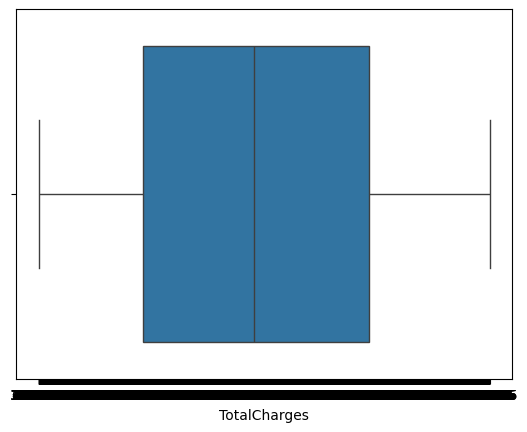

In [12]:
sns.boxplot(x=df['TotalCharges'])

<Axes: xlabel='MonthlyCharges'>

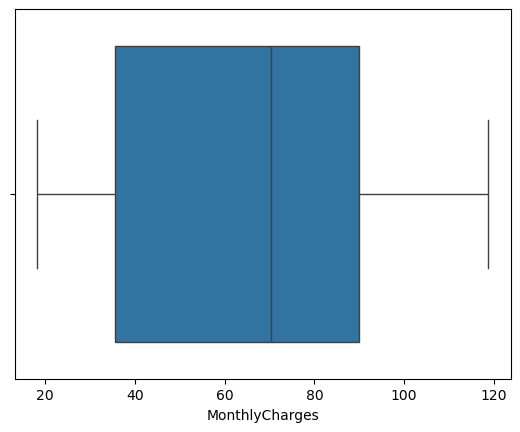

In [13]:
sns.boxplot(x=df['MonthlyCharges'])

<Axes: xlabel='Churn', ylabel='Count'>

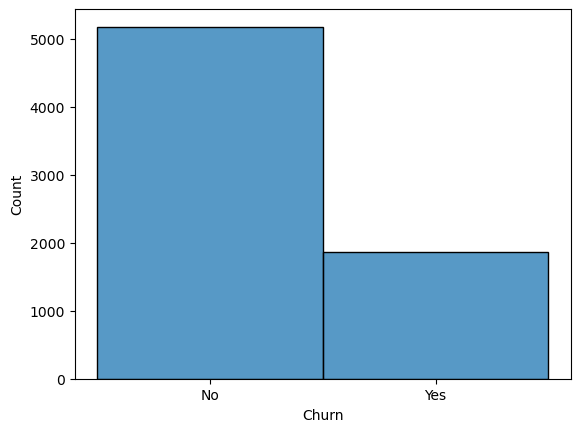

In [14]:
sns.histplot(df['Churn'])

<Axes: xlabel='Churn', ylabel='gender'>

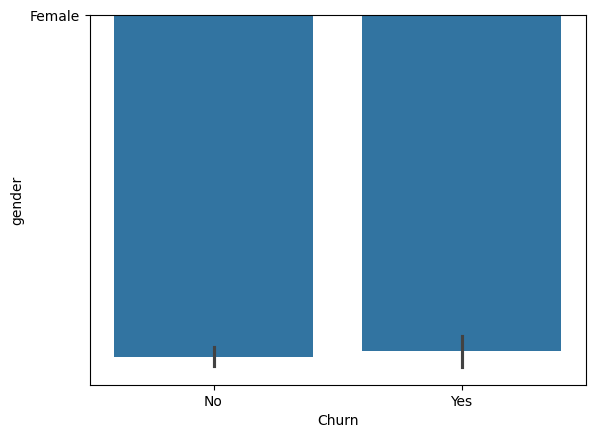

In [16]:
sns.barplot(y=df['gender'] , x=df['Churn'])

<Axes: xlabel='StreamingMovies', ylabel='Churn'>

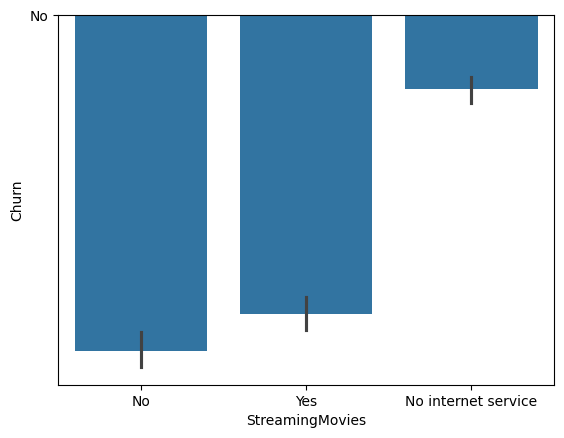

In [18]:
sns.barplot(x=df['StreamingMovies'] , y=df['Churn'])

In [8]:
df = df.drop(columns='customerID' , axis=1)

In [68]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score , recall_score , precision_score
from sklearn.ensemble import RandomForestClassifier

In [10]:
df_encode = df.copy()

In [11]:
encode_cols = ['gender' , 'Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection',
              'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling']
le = LabelEncoder()
for i in encode_cols:
    df_encode[i] = le.fit_transform(df_encode[i])

In [30]:
scale_cols = ['tenure' ,'MonthlyCharges','TotalCharges']
scaler = StandardScaler()
for i in scale_cols:
    df_encode[i] = scaler.fit_transform(df_encode[[i]])

In [31]:
df_encode['Churn'] = le.fit_transform(df_encode['Churn'])

In [ ]:
one_cols = ['InternetService' , 'Contract' , 'PaymentMethod']
dummies = pd.get_dummies(df_encode[one_cols] , drop_first=True , dtype=int)
df_encode = pd.concat([df_encode.drop(columns=one_cols) , dummies] , axis=1)

In [21]:
df_encode['TotalCharges'] = df_encode['TotalCharges'].replace(" ", np.nan)
df_encode['TotalCharges'] = pd.to_numeric(df_encode['TotalCharges'])
df_encode['TotalCharges'] = df_encode['TotalCharges'].fillna(0).astype(float)

In [34]:
X = df_encode.drop(columns='Churn' , axis=1)
y = df_encode['Churn']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(X_test)

In [70]:
acc_lg = accuracy_score(y_test, y_pred_xgb)



In [42]:
import xgboost as xgb 
model2 = xgb.XGBClassifier(
      n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=3,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)
model2.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
y_pred_xgb = model2.predict(X_test)
acc_xgb = accuracy_score(y_test , y_pred_xgb)
precision_score(y_test, y_pred, average='weighted')
recall_score(y_test, y_pred, average='weighted')
f1_score(y_test, y_pred, average='weighted')
print("XGBoost ->", acc_xgb, prec_xgb, rec_xgb, f1_xgb)

XGBoost -> 0.8019872249822569 0.6556291390728477 0.5308310991957105 0.5866666666666667


In [78]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train , y_train)

RandomForestClassifier()

In [80]:
y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test , y_pred_rf)

# Comparison

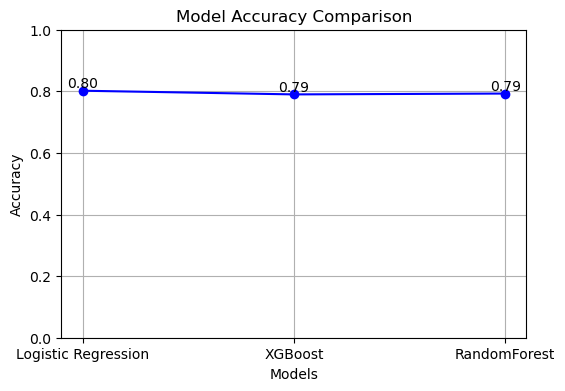

In [81]:
import matplotlib.pyplot as plt

# Suppose you have accuracies
acc_log = 0.76   # Logistic Regression accuracy
acc_xgb = 0.79   # XGBoost accuracy

# Create lists
models = ["Logistic Regression", "XGBoost" , 'RandomForest']
accuracies = [acc_lg, acc_xgb , acc_rf]

# Line plot
plt.figure(figsize=(6,4))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')

# Labels & title
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0,1)   # keep scale between 0 and 1
plt.grid(True)

# Annotate points
for i, acc in enumerate(accuracies):
    plt.text(models[i], acc+0.01, f"{acc:.2f}", ha='center')

plt.show()


# Enhancement

In [56]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength (inverse)
    'penalty': ['l1', 'l2'],               # Regularization type
    'class_weight': [None, 'balanced']     # Handle imbalance
}

In [64]:
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=1
)

In [65]:
grid.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [66]:
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best F1 Score: 0.6226696978581756


### Model Recommendation

After evaluating multiple machine learning models on the **Customer Churn Prediction dataset**, including:

- **Logistic Regression** (with GridSearchCV tuning)  
- **Random Forest**  
- **XGBoost**

I found that **Logistic Regression consistently provided the best balance of performance and interpretability**.  

- **Performance**: Logistic Regression achieved higher F1-score compared to Random Forest and XGBoost, making it more reliable for detecting churners in an imbalanced dataset.  
- **Simplicity & Interpretability**: Logistic Regression provides clear insights into which features increase or decrease churn probability. This transparency is valuable for business decision-making.  
- **Business Value**: For churn prediction, it’s not just about raw accuracy. Companies need **actionable insights** to understand *why* customers are leaving. Logistic Regression allows stakeholders to interpret coefficients directly (e.g., contract type, payment method, tenure), making it easier to design targeted retention strategies.  

📌 **Recommendation:**  
I recommend using **Logistic Regression** as the final model for Customer Churn Prediction because it offers a strong trade-off between predictive power and interpretability, which is essential for making data-driven business decisions.


# Some advancements

In [105]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow import keras
from keras import layers

In [106]:
model_an = Sequential([
    Dense(128 , input_dim = 23 , activation='relu' , kernel_regularizer=keras.regularizers.L2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64 , activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32 , activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1 , activation='sigmoid')
])

In [107]:
model_an.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [108]:
history = model_an.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs=60 ,batch_size= 10 )

Epoch 1/60
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7144 - loss: 0.6190 - val_accuracy: 0.7984 - val_loss: 0.4614
Epoch 2/60
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7735 - loss: 0.5201 - val_accuracy: 0.8119 - val_loss: 0.4532
Epoch 3/60
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7650 - loss: 0.5082 - val_accuracy: 0.8141 - val_loss: 0.4467
Epoch 4/60
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7792 - loss: 0.4899 - val_accuracy: 0.8070 - val_loss: 0.4394
Epoch 5/60
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7803 - loss: 0.4836 - val_accuracy: 0.8190 - val_loss: 0.4336
Epoch 6/60
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7748 - loss: 0.4863 - val_accuracy: 0.8098 - val_loss: 0.4346
Epoch 7/60
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7847 - loss: 0.4767 - val_accuracy: 0.8133 - val_loss: 0.4298
Epoch 8/60
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7771 - loss: 0.4732 - val_accuracy: 0.

<Axes: >

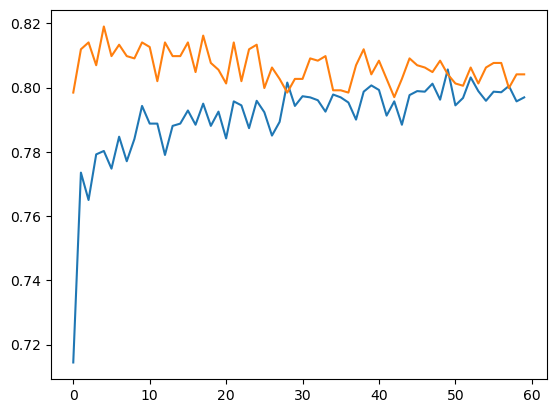

In [109]:
sns.lineplot(history.history['accuracy'] )
sns.lineplot(history.history['val_accuracy'])

<Axes: >

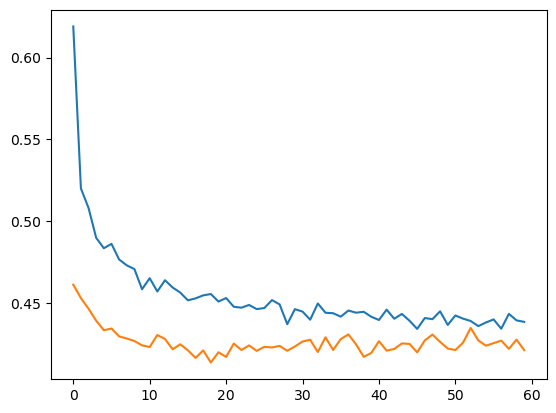

In [110]:
sns.lineplot(history.history['loss'] )
sns.lineplot(history.history['val_loss'])